In [31]:
import mplfinance as mpf
from pandas_datareader import data
import talib as ta
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [38]:
start = '2020-01-01'
end = '2022-05-20'

df = data.DataReader('^N225', 'yahoo', start, end)

In [4]:
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,23365.359375,23148.529297,23319.759766,23204.859375,72800000,23204.859375
2020-01-07,23577.439453,23299.919922,23320.119141,23575.720703,64300000,23575.720703
2020-01-08,23303.210938,22951.179688,23217.490234,23204.759766,79400000,23204.759766
2020-01-09,23767.089844,23506.150391,23530.289062,23739.869141,62200000,23739.869141
2020-01-10,23903.289062,23761.080078,23813.279297,23850.570312,55900000,23850.570312
2020-01-14,24059.859375,23951.660156,23969.039062,24025.169922,64200000,24025.169922
2020-01-15,23997.390625,23875.820312,23923.480469,23916.580078,57200000,23916.580078
2020-01-16,23975.380859,23905.380859,23960.199219,23933.130859,55400000,23933.130859
2020-01-17,24115.949219,24013.750000,24103.449219,24041.259766,59400000,24041.259766


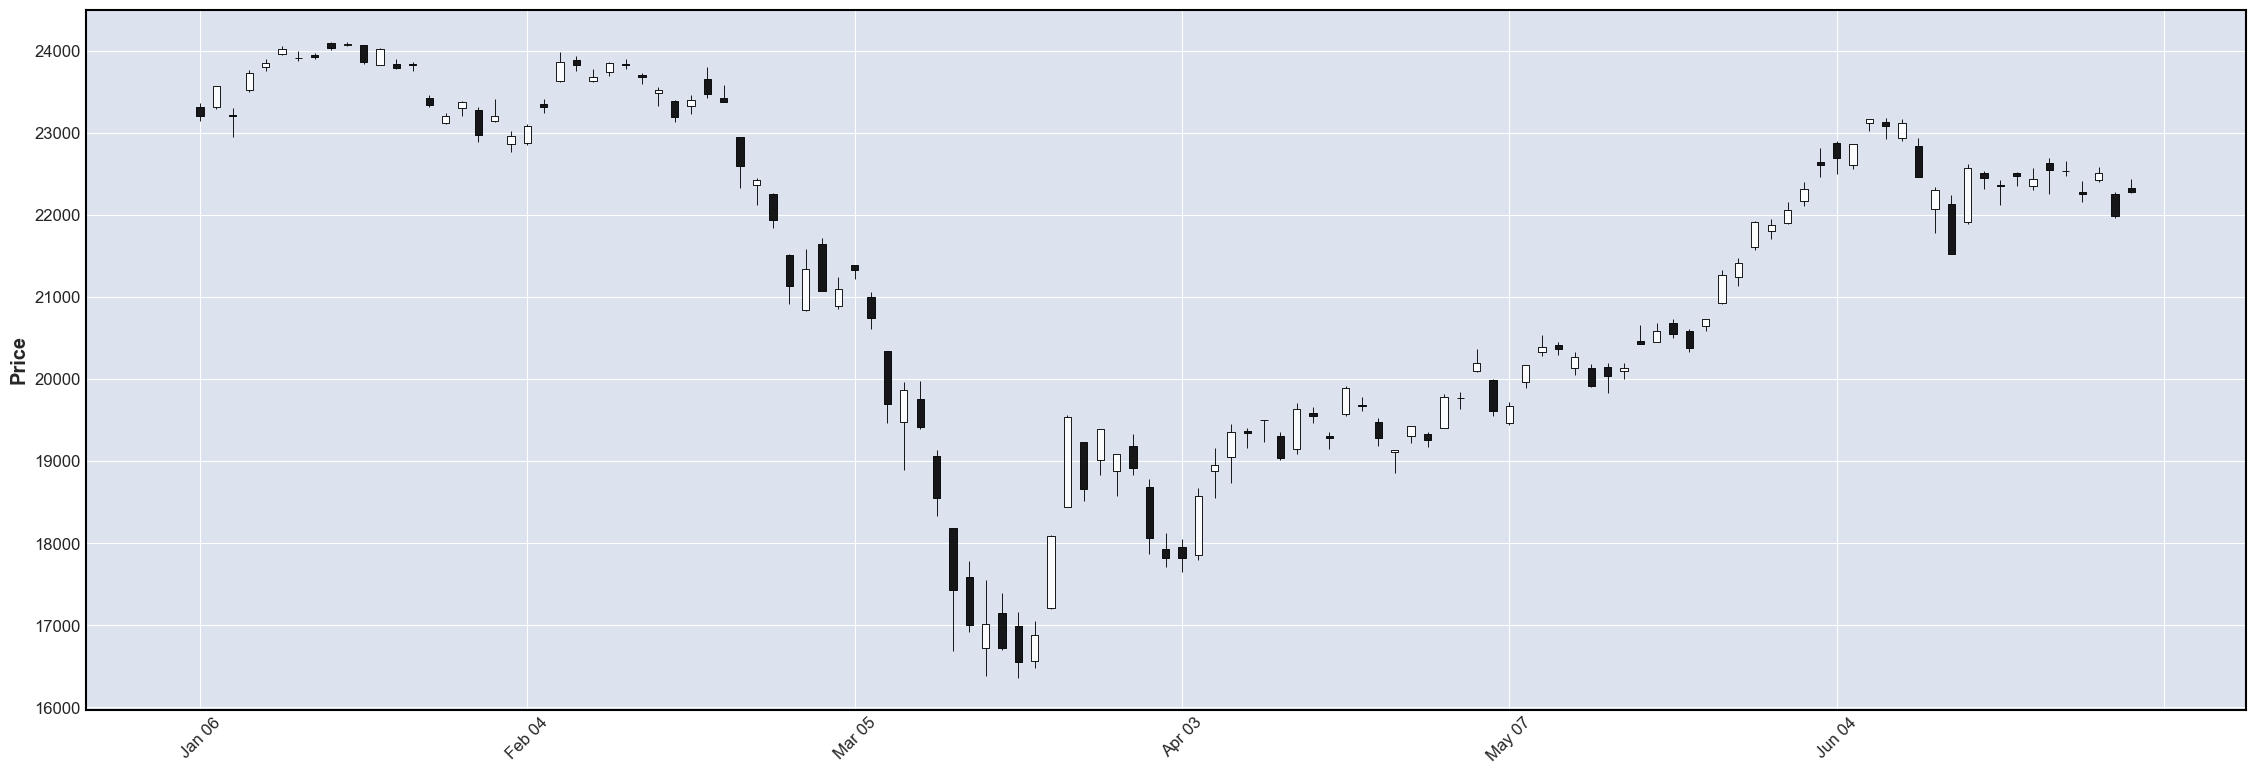

In [5]:
mpf.plot(df, type='candle', figsize=(30, 10))

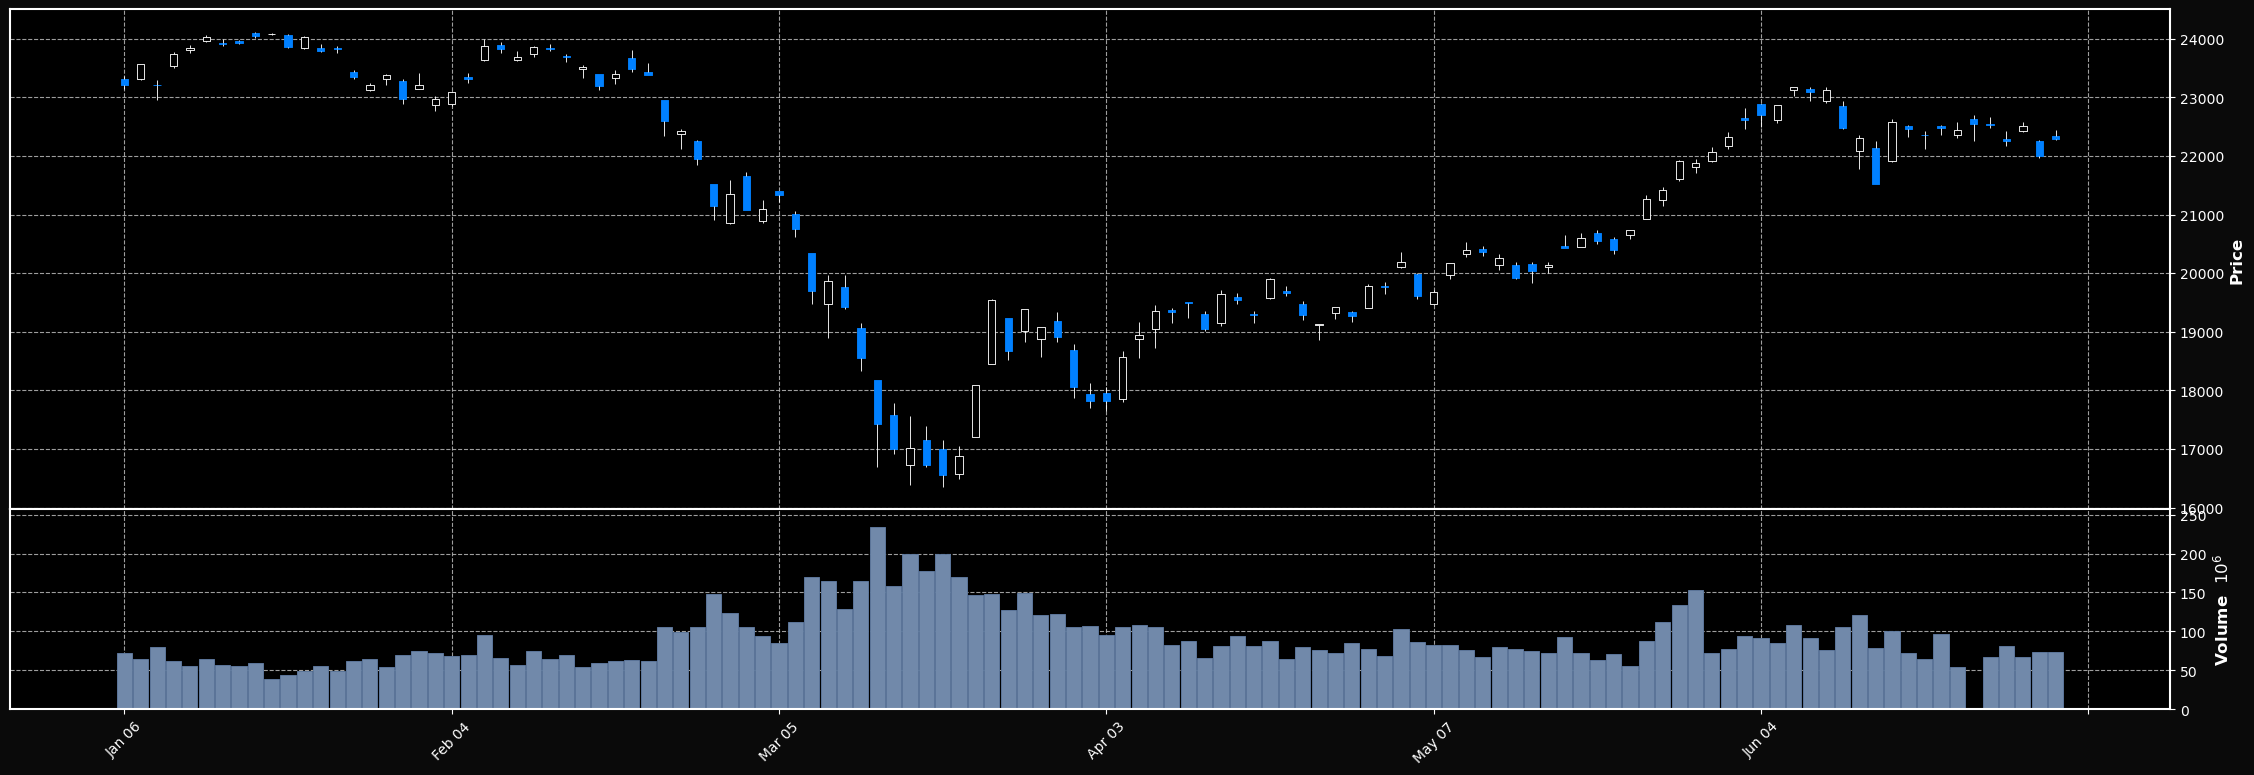

In [10]:
mpf.plot(df, type='candle', figsize=(30, 10), style='mike',volume = True)

In [12]:
df['upper'],df['middle'],df['lower'] = ta.BBANDS(df['Adj Close'], timeperiod = 25,
                                                 nbdevup=2, nbdevdn=2, matype=0)

In [13]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower
Date,,,,,,,,,
2020-06-24,22663.289062,22479.859375,22541.009766,22534.320312,67000000,22534.320312,23668.783006,22152.969297,20637.155588
2020-06-25,22423.410156,22165.140625,22287.869141,22259.789062,80800000,22259.789062,23589.084373,22221.268437,20853.452502
2020-06-26,22589.140625,22408.269531,22424.369141,22512.080078,66600000,22512.080078,23454.238943,22306.225234,21158.211526
2020-06-29,22281.380859,21969.589844,22255.050781,21995.039062,73700000,21995.039062,23321.613062,22356.360781,21391.108501
2020-06-30,22448.300781,22273.380859,22335.099609,22288.140625,74200000,22288.140625,23255.768474,22397.039609,21538.310745


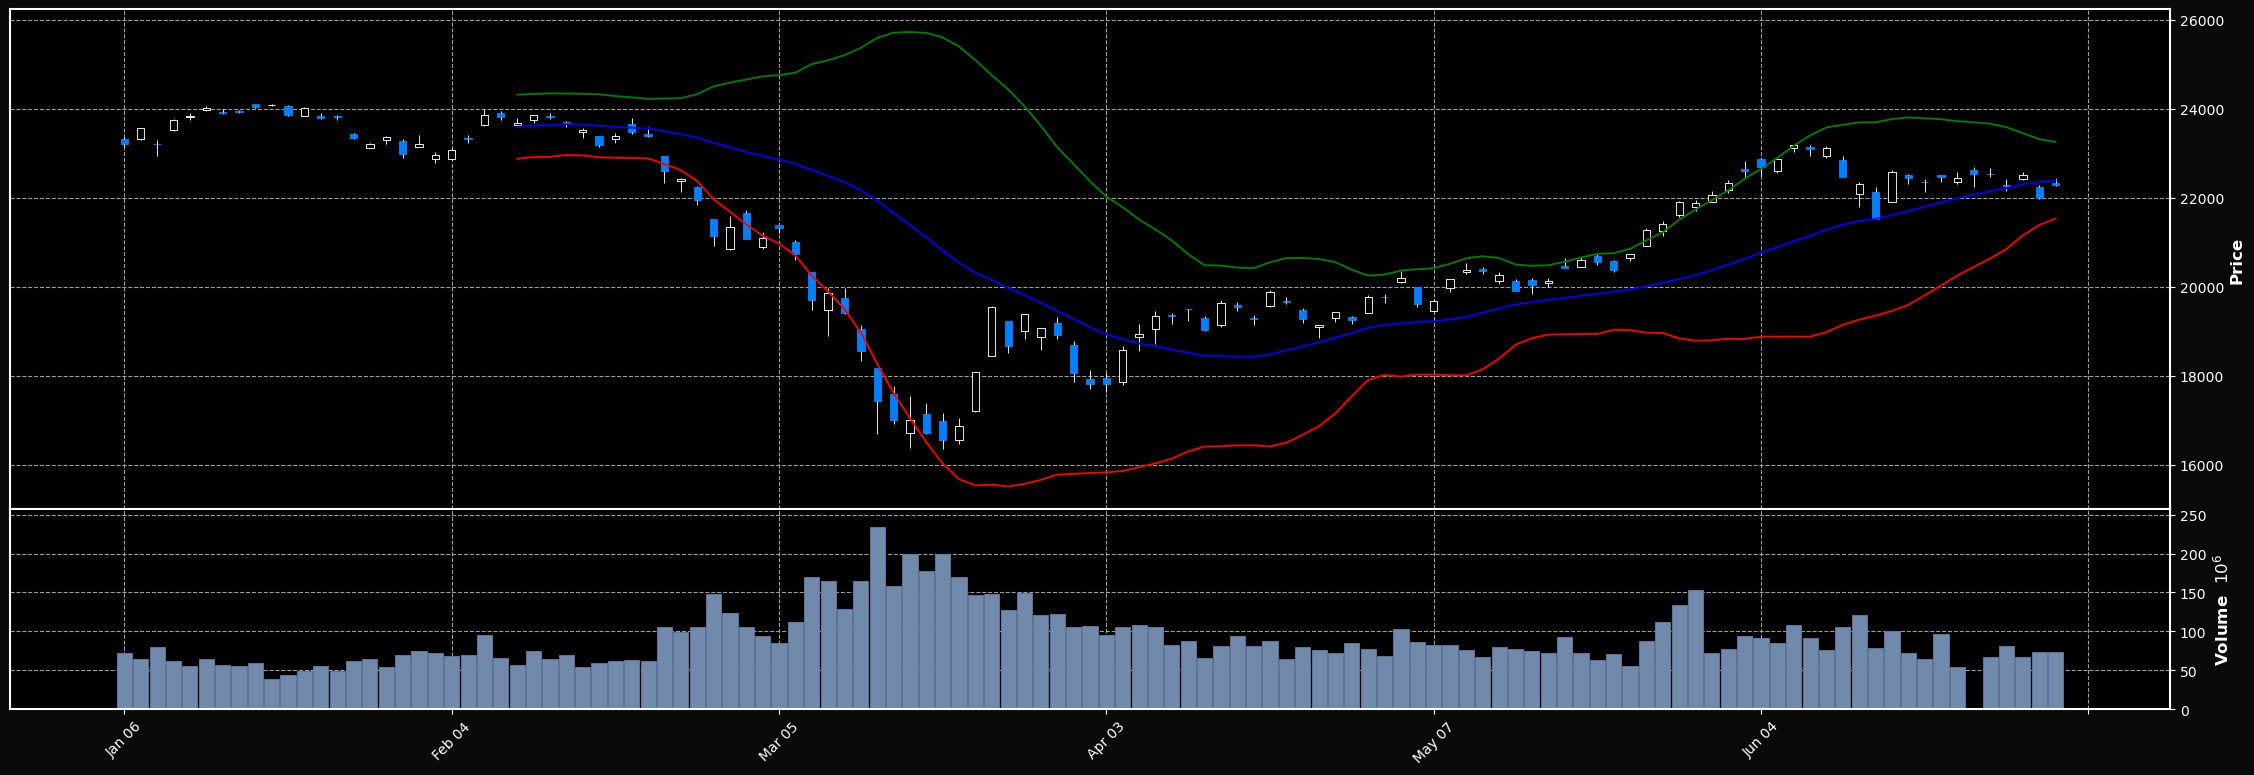

In [14]:
apds = [mpf.make_addplot(df['upper'], color = 'g'),
        mpf.make_addplot(df['middle'], color = 'b'),
        mpf.make_addplot(df['lower'], color = 'r')
        ]
mpf.plot(df, type='candle', figsize=(30, 10), style='mike',volume = True, addplot = apds)


In [15]:
df['macd'], df['macdsignal'], df['macdhist']=ta.MACD(df['Adj Close'], fastperiod=12, 
                                                     slowperiod=26, signalperiod=9)

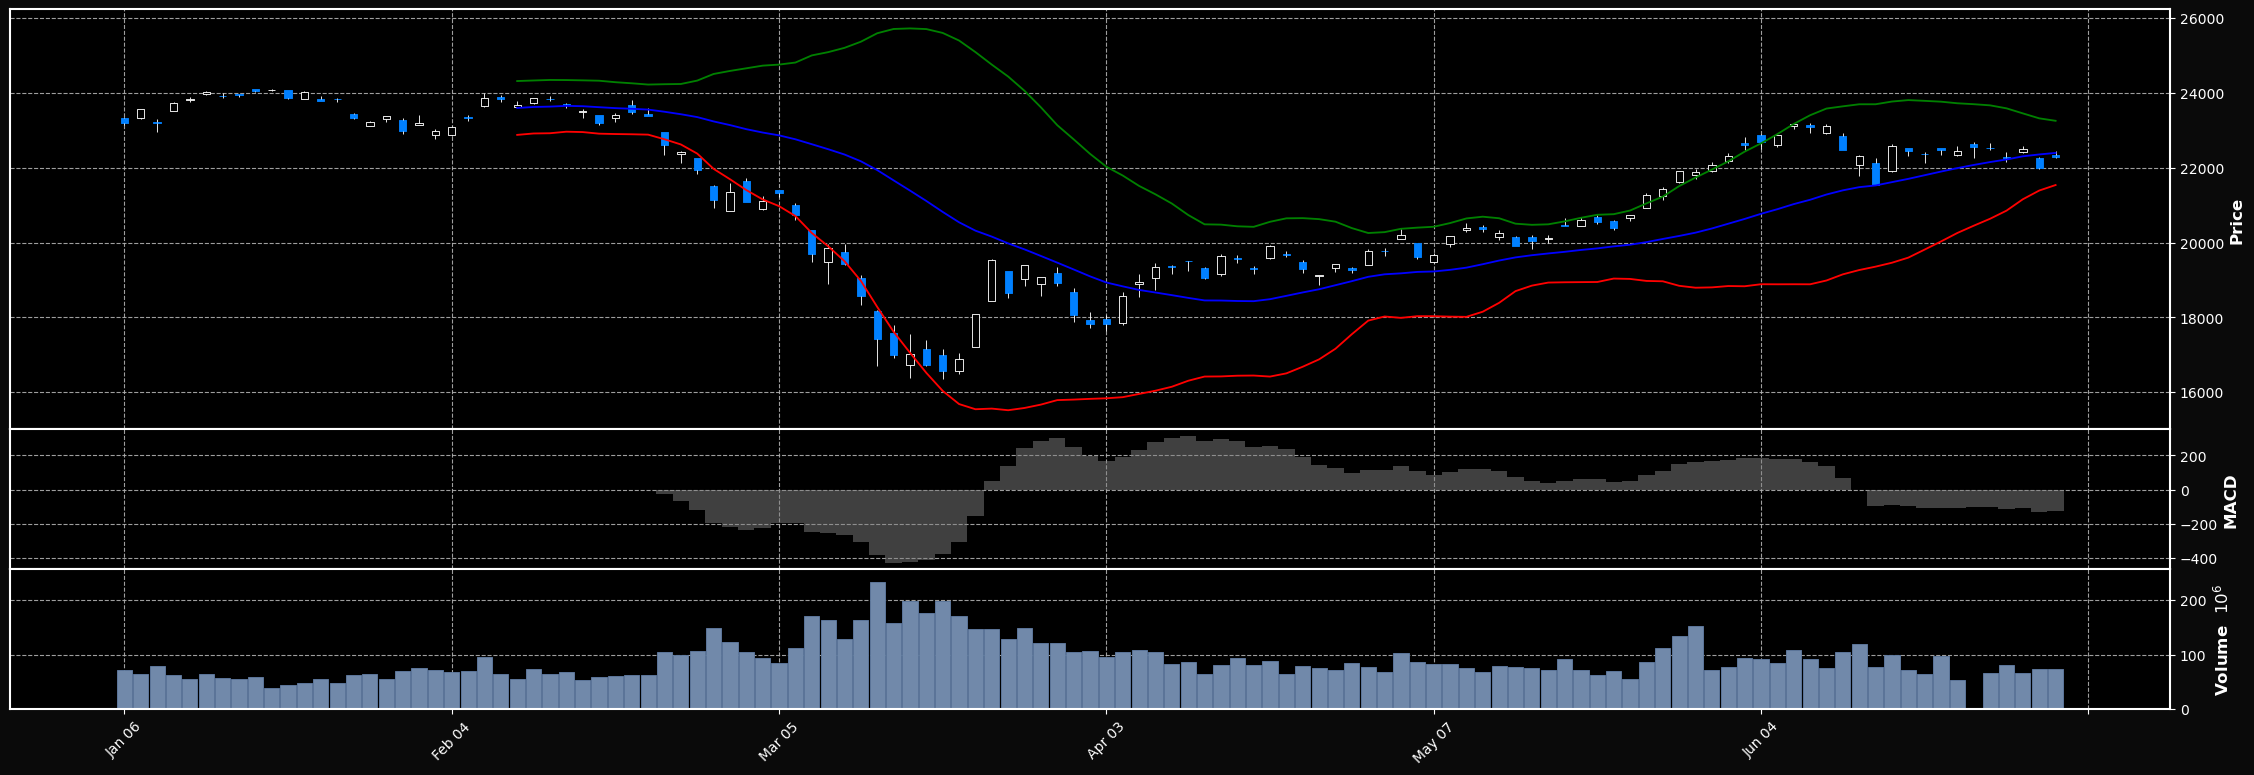

In [18]:
apds = [mpf.make_addplot(df['upper'], color = 'g'),
        mpf.make_addplot(df['middle'], color = 'b'),
        mpf.make_addplot(df['lower'], color = 'r'),
        mpf.make_addplot(df['macdhist'], type='bar', color='gray',
                         width=1.0, panel=1, alpha=0.5, ylabel='MACD')
        ]
mpf.plot(df, type='candle', figsize=(30, 10), style='mike',volume = True, addplot = apds,
         volume_panel=2, panel_ratios=(3,1,1))

In [19]:
df['RSI'] = ta.RSI(df['Adj Close'], timeperiod=25)

In [28]:
apds = [mpf.make_addplot(df['upper'], color = 'g'),  #ﾎﾞﾘﾝｼﾞｬｰ
        mpf.make_addplot(df['middle'], color = 'b'),
        mpf.make_addplot(df['lower'], color = 'r'),
        mpf.make_addplot(df['macdhist'], type='bar', color='dimgray',   #MACD
                         width=0.7, panel=1, alpha=0.5, ylabel='MACD'),
        mpf.make_addplot(df['RSI'], panel=2, type='line', ylabel='RSI',color='blue')  #RSI
        ]

mpf.plot(df, type='candle', figsize=(30, 15), style='yahoo',volume = True, addplot = apds,
         volume_panel=3, panel_ratios=(5,2,2,1), savefig='tec.png') 
mpf.show()

In [40]:
date = df.index
high = df['High']
low = df['Low']

max26 = high.rolling(window=26).max()
min26 = low.rolling(window=26).min()

df['basic_line'] = (max26 + min26) / 2

In [30]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,upper,middle,lower,macd,macdsignal,macdhist,RSI,basic_line
Date,,,,,,,,,,,,,,
2020-06-24,22663.289062,22479.859375,22541.009766,22534.320312,67000000,22534.320312,23668.783006,22152.969297,20637.155588,419.231405,518.649891,-99.418486,58.298703,21760.419922
2020-06-25,22423.410156,22165.140625,22287.869141,22259.789062,80800000,22259.789062,23589.084373,22221.268437,20853.452502,375.889013,490.097715,-114.208703,55.946788,21760.419922
2020-06-26,22589.140625,22408.269531,22424.369141,22512.080078,66600000,22512.080078,23454.238943,22306.225234,21158.211526,357.773441,463.632861,-105.859419,57.584822,21760.419922
2020-06-29,22281.380859,21969.589844,22255.050781,21995.039062,73700000,21995.039062,23321.613062,22356.360781,21391.108501,298.257702,430.557829,-132.300127,53.350032,21884.955078
2020-06-30,22448.300781,22273.380859,22335.099609,22288.140625,74200000,22288.140625,23255.768474,22397.039609,21538.310745,271.610935,398.768450,-127.157515,55.291524,22051.979492


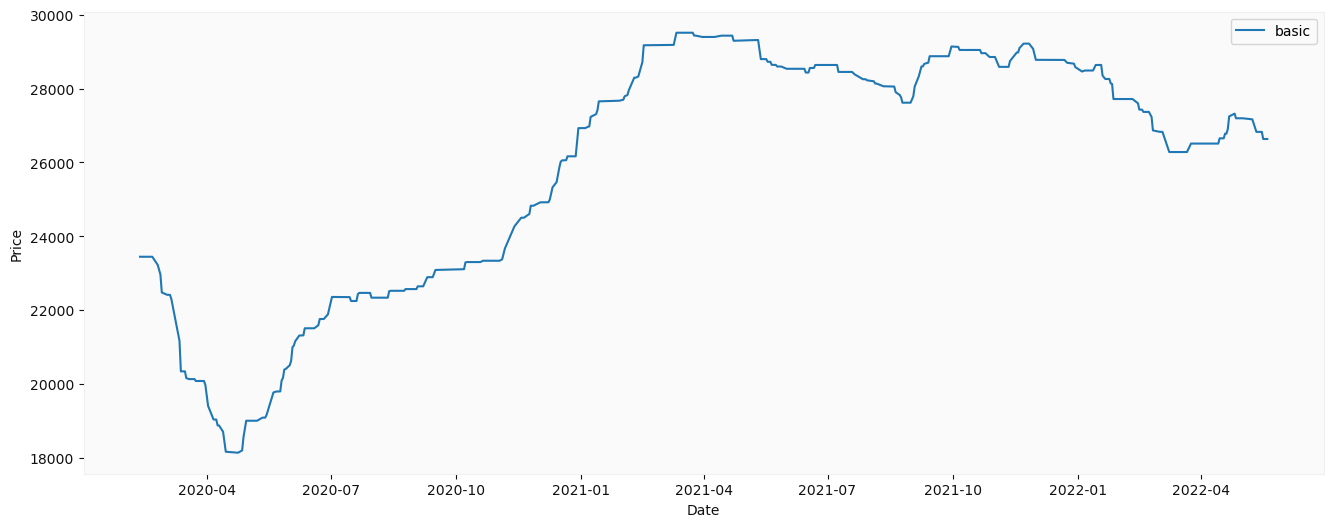

In [41]:
plt.figure(figsize=(16, 6))
plt.plot(df['basic_line'], label='basic')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [42]:
high9 = high.rolling(window=9).max()
low9 = low.rolling(window=9).min()

df['turn_line'] = (high9 + low9) / 2

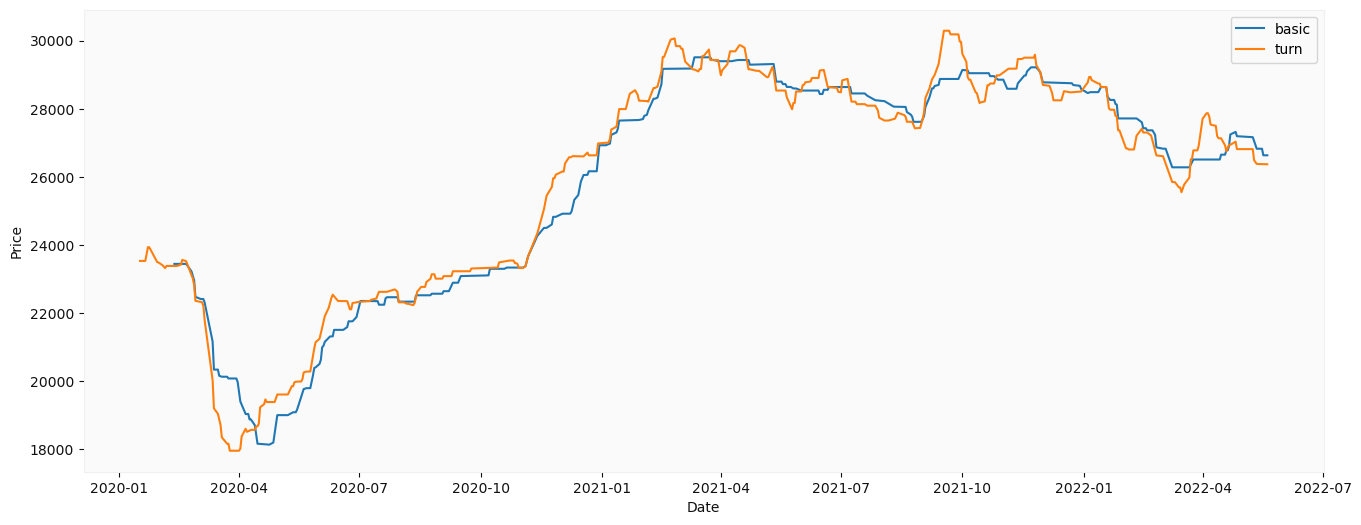

In [43]:
plt.figure(figsize=(16, 6))
plt.plot(df['basic_line'], label='basic')
plt.plot(df['turn_line'], label='turn')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [44]:
df['span1'] = (df['basic_line'] + df['turn_line']) / 2

In [45]:
high52 = high.rolling(window=52).max()
low52 = low.rolling(window=52).min()

df['span2'] = (high52 + low52) / 2

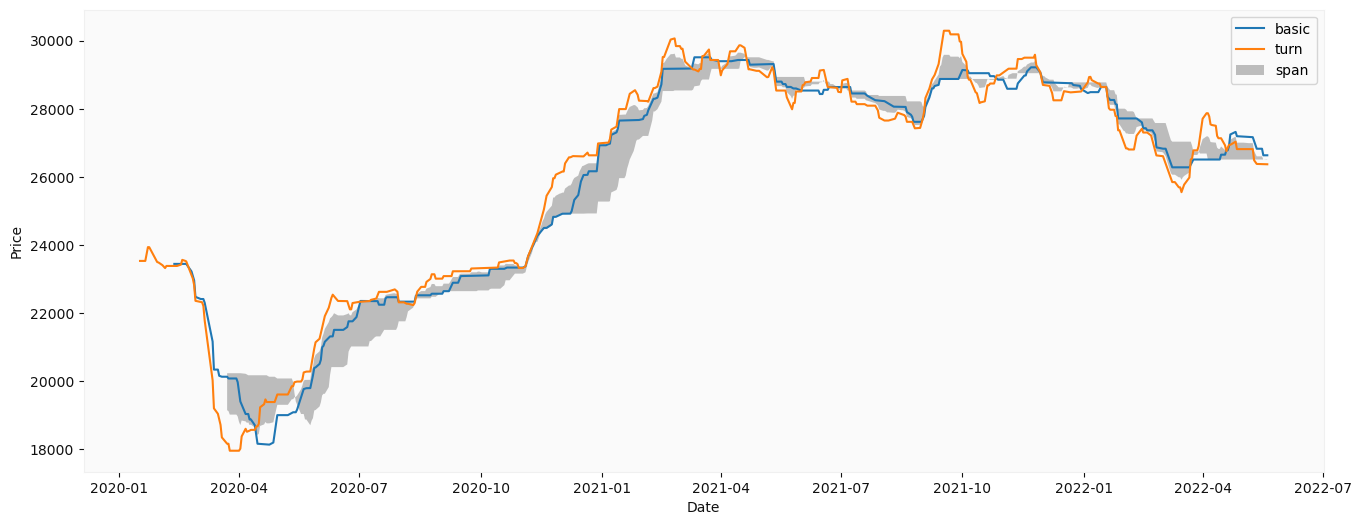

In [46]:
plt.figure(figsize=(16, 6))
plt.plot(df['basic_line'], label='basic')
plt.plot(df['turn_line'], label='turn')
plt.fill_between(date, df['span1'], df['span2'], facecolor='gray',alpha=0.5, label='span')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [47]:
df['slow_line'] = df['Adj Close'].shift(-25)

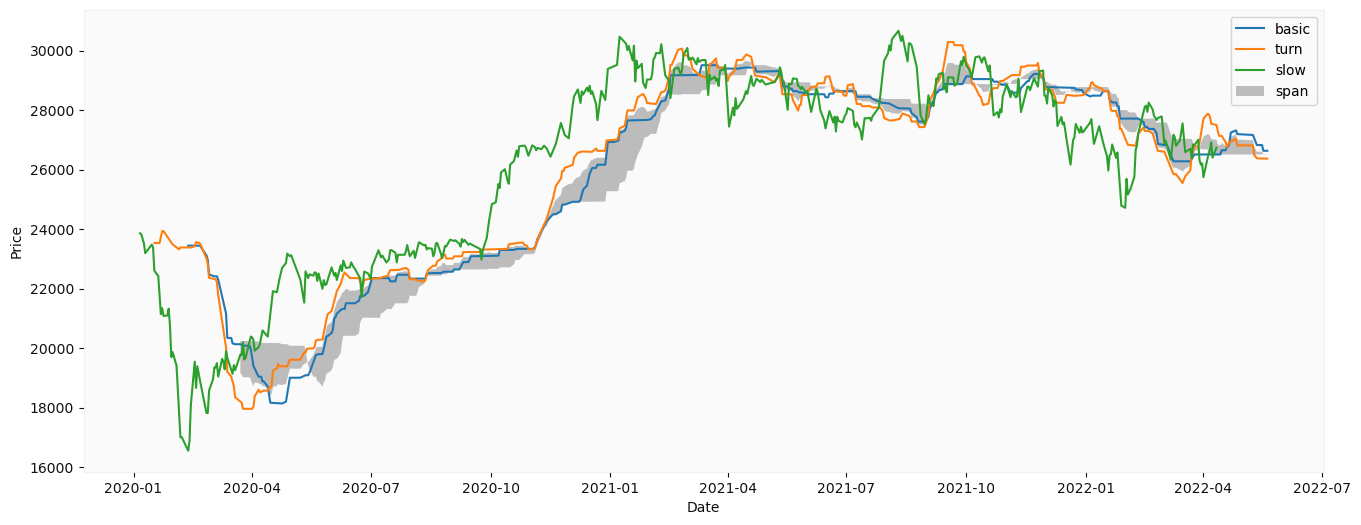

In [48]:
plt.figure(figsize=(16, 6))
plt.plot(df['basic_line'], label='basic')
plt.plot(df['turn_line'], label='turn')
plt.fill_between(date, df['span1'], df['span2'], facecolor='gray',alpha=0.5, label='span')
plt.plot(df['slow_line'], label='slow')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [51]:
lines = [mpf.make_addplot(df['basic_line']),  #基準線
         mpf.make_addplot(df['turn_line']),   #転換線
         mpf.make_addplot(df['slow_line']),   #遅行線
        ]

labels = ['basic', 'turn', 'low', 'span']

fig, ax = mpf.plot(df, type='candle', figsize=(16,6), style='yahoo', xrotation=0,
                   addplot=lines, returnfig=True,
                   fill_between=dict(y1=df['span1'].values, y2=df['span2'].values,
                                     alpha=0.5, color='gray'),savefig='ichimoku.png')

ax[0].legend(labels)
plt.show()